In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get NVDA stock data on daily basis
stock = yf.Ticker("TSLA")
stock_hist = stock.history(period="3y")
stock_hist = stock_hist.dropna()

#add a column daily return
stock_hist['daily_return'] = stock_hist['Close'].pct_change()

<Axes: xlabel='Date'>

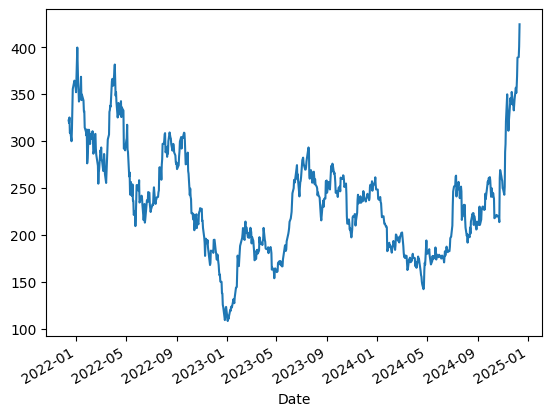

In [3]:
stock_hist.Close.plot()

In [4]:
# Computing the constant component of dividend
avg_price = stock_hist['Close'].mean()
risk_free = 0.0001
dividend = avg_price * risk_free
print("Dividend: ", dividend)

Dividend:  0.023543210419672556


<Axes: xlabel='Date'>

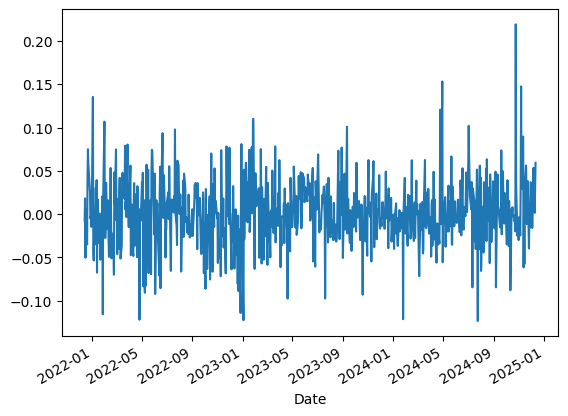

In [5]:
stock_hist.daily_return.plot()

In [6]:
#first order auto correlation of closing prices
autocorr = stock_hist['Close'].autocorr()
print("First order auto correlation of closing prices: ", autocorr)

First order auto correlation of closing prices:  0.9864334329785663


In [8]:
#skewness and kurtosis of daily returns
skewness = stock_hist['daily_return'].skew()
kurtosis = stock_hist['daily_return'].kurtosis()
print("Skewness of daily returns: ", skewness)
print("Kurtosis of daily returns: ", kurtosis)

Skewness of daily returns:  0.2854566984525386
Kurtosis of daily returns:  2.282526373735815


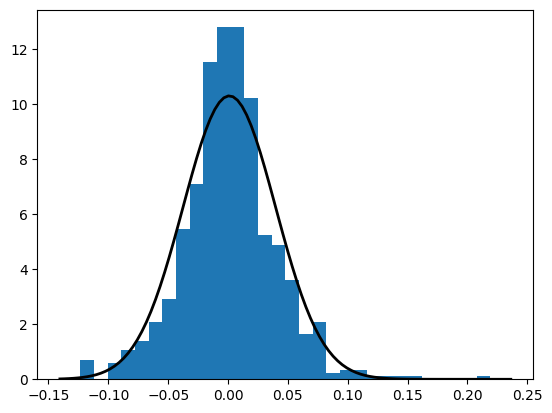

In [10]:
import scipy.stats as stats
from scipy.stats import norm

#plot histogram of daily returns
fig, ax = plt.subplots()
ax.hist(stock_hist['daily_return'], bins=30, density=True)
#overlay a normal distribution
mean = stock_hist['daily_return'].mean()
std = stock_hist['daily_return'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
ax.plot(x, p, 'k', linewidth=2)
plt.show()